In [ ]:
!pip install minisom

import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=1b2415750d8f3440430386d4914a59953a5b67d09678578a15843a27cdd54cb8
  Stored in directory: /root/.cache/pip/wheels/c8/29/ba/ee521d9a6af783a1e1efb1831fe4afdf526613849b3f58175b
Successfully built minisom


In [ ]:
countries = [
    "Reino Unido", "Austrália", "Canadá", "Estados Unidos", "Japão", "França",
    "Cingapura", "Argentina", "Uruguai", "Cuba", "Colômbia", "Brasil", "Paraguai",
    "Egito", "Nigéria", "Senegal", "Serra Leoa", "Angola", "Etiópia", "Moçambique",
    "China"
]

# Expectitavia de vida, educacao, pib, estabilidade politica de cada país
data = np.array([
    [0.88, 0.99, 0.91, 1.10],
    [0.90, 0.99, 0.93, 1.26],
    [0.90, 0.98, 0.94, 1.24],
    [0.87, 0.98, 0.97, 1.18],
    [0.93, 0.93, 0.93, 1.20],
    [0.89, 0.97, 0.92, 1.04],
    [0.88, 0.87, 0.91, 1.41],
    [0.81, 0.92, 0.80, 0.55],
    [0.82, 0.92, 0.75, 1.05],
    [0.65, 0.90, 0.44, 0.17],
    [0.77, 0.85, 0.69, -1.36],
    [0.71, 0.63, 0.72, 0.77],
    [0.75, 0.83, 0.63, -0.87],
    [0.70, 0.62, 0.60, 0.21],
    [0.44, 0.58, 0.37, -1.36],
    [0.47, 0.37, 0.45, -0.68],
    [0.23, 0.33, 0.27, -1.26],
    [0.34, 0.36, 0.51, -1.98],
    [0.31, 0.35, 0.32, -0.55],
    [0.24, 0.37, 0.36, 0.20],
    [0.76, 0.80, 0.95, 0.69]
])

In [ ]:
# Normalização dos dados (Z-score)
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

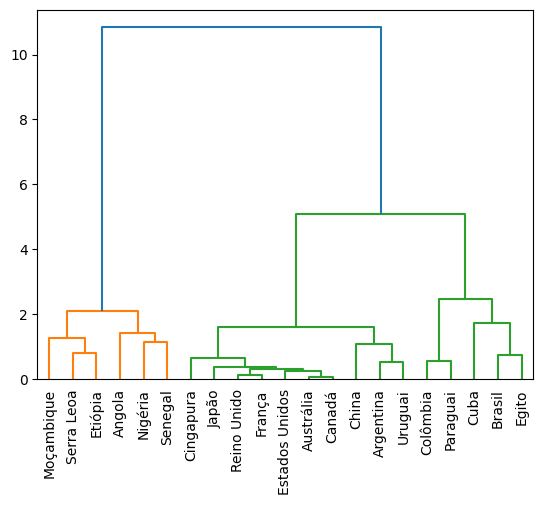

In [ ]:
dendrogram(linkage(data, 'ward'), labels=countries, leaf_rotation=90)
plt.show()

In [ ]:
# Criação do SOM
som = MiniSom(20, 20, data.shape[1], sigma=1.5, learning_rate=0.5, neighborhood_function='gaussian', random_seed=0)
som.random_weights_init(data)

# Treinamento em duas fases
som.train_random(data, 25000)
som.sigma = 0.5
som.train_random(data, 25000)

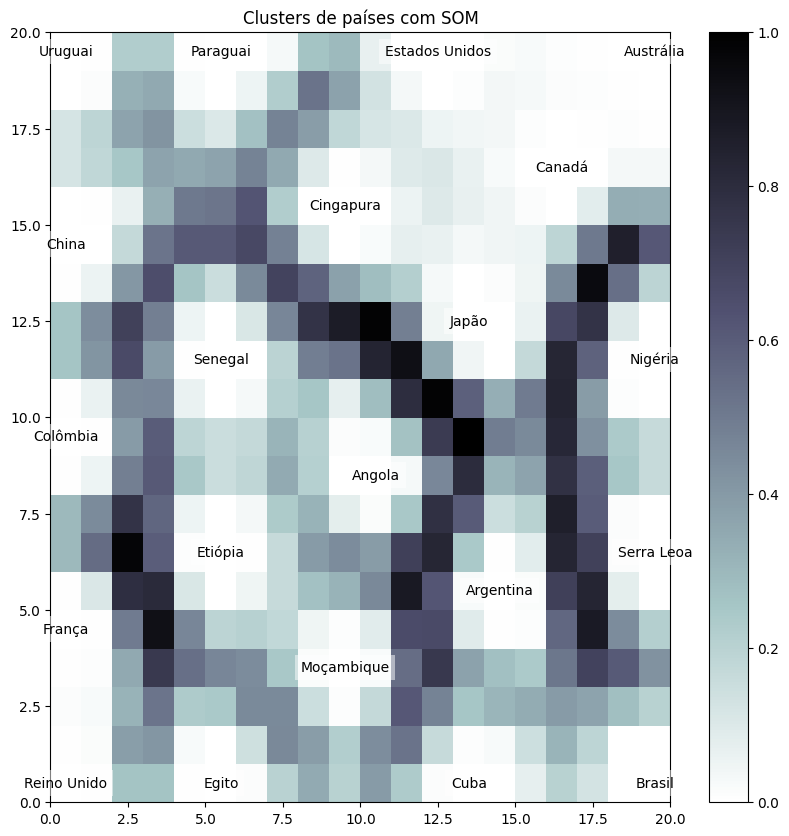

In [ ]:
# Gráfico dos resultados
plt.figure(figsize=(10, 10))
for i, x in enumerate(data):
    w = som.winner(x)
    plt.text(w[0] + .5, w[1] + .5, countries[i], ha='center', va='center',
             bbox=dict(facecolor='white', alpha=0.5, lw=0))
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar()
plt.title('Clusters de países com SOM')
plt.show()
